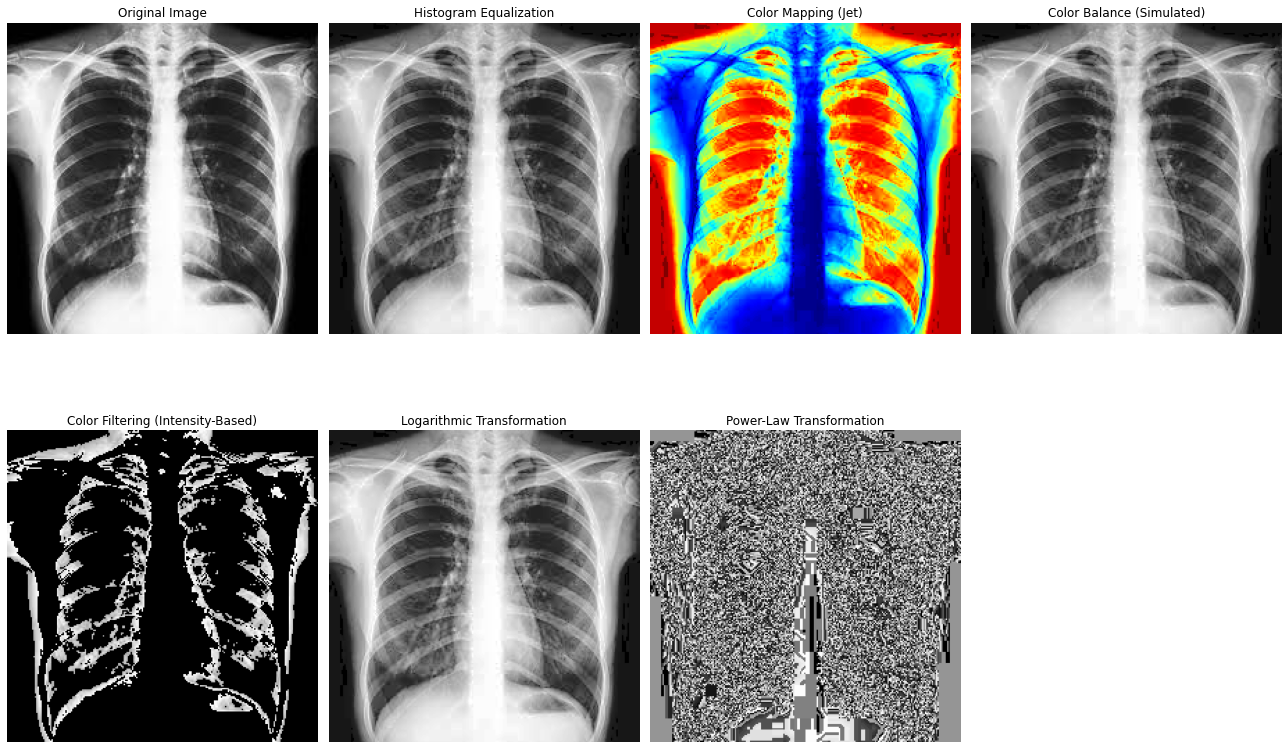

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt




image_path = 'xray_chest.jpg'
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if original_image is None:   # sir wo problem kr rha tha loading me is lye lagaya 
    raise ValueError(f"Image at path {image_path} could not be loaded. Please check the file path.")

equalized_image = cv2.equalizeHist(original_image)

if equalized_image is not None and len(equalized_image.shape) == 2:
    color_mapped_image = cv2.applyColorMap(equalized_image, cv2.COLORMAP_JET)
else:
    raise ValueError("Error in processing equalized_image. Ensure it is a valid 2D image.")

color_image = cv2.cvtColor(equalized_image, cv2.COLOR_GRAY2BGR)
color_balanced_image = cv2.normalize(color_image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

lower_bound = 100
upper_bound = 150
mask = cv2.inRange(equalized_image, lower_bound, upper_bound)
filtered_image = cv2.bitwise_and(equalized_image, equalized_image, mask=mask)

normalized_image = equalized_image / 255.0
log_image = np.log1p(normalized_image)
log_image = cv2.normalize(log_image, None, 0, 255, cv2.NORM_MINMAX)
log_image = np.uint8(log_image)

gamma = 0.5
gamma_corrected_image = np.power(equalized_image / 255.0, gamma)
gamma_corrected_image = cv2.normalize(gamma_corrected_image, None, 0, 255, cv2.NORM_MINMAX)
gamma_corrected_image = np.uint8(gamma_corrected_image * 255)

plt.figure(figsize=(18, 12))

plt.subplot(2, 4, 1)
plt.title('Original Image')
plt.imshow(original_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.title('Histogram Equalization')
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.title('Color Mapping (Jet)')
plt.imshow(color_mapped_image)
plt.axis('off')

plt.subplot(2, 4, 4)
plt.title('Color Balance (Simulated)')
plt.imshow(cv2.cvtColor(color_balanced_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 4, 5)
plt.title('Color Filtering (Intensity-Based)')
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 6)
plt.title('Logarithmic Transformation')
plt.imshow(log_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 7)
plt.title('Power-Law Transformation')
plt.imshow(gamma_corrected_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


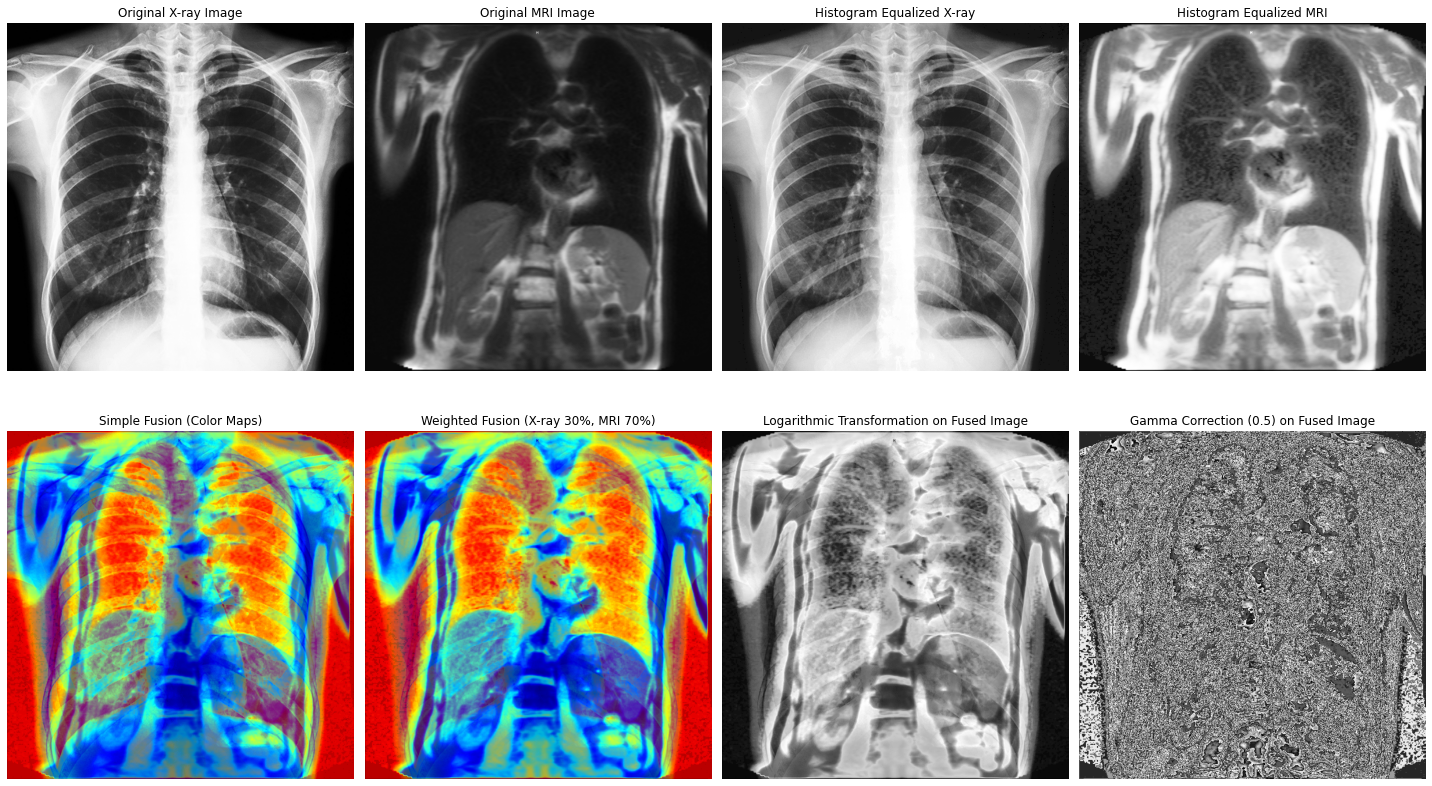

In [2]:
# task 2 


xray_image_path = 'xray_image.png'
mri_image_path = 'mri_image.png'

xray_image = cv2.imread(xray_image_path, cv2.IMREAD_GRAYSCALE)
mri_image = cv2.imread(mri_image_path, cv2.IMREAD_GRAYSCALE)

if xray_image is None or mri_image is None:
    raise ValueError("One or both images could not be loaded. Please check the file paths.")

mri_image_resized = cv2.resize(mri_image, (xray_image.shape[1], xray_image.shape[0]))

xray_equalized = cv2.equalizeHist(xray_image)
mri_equalized = cv2.equalizeHist(mri_image_resized)

xray_colormap = cv2.applyColorMap(xray_equalized, cv2.COLORMAP_JET)
mri_colormap = cv2.applyColorMap(mri_equalized, cv2.COLORMAP_JET)

fused_image_simple = cv2.addWeighted(xray_colormap, 0.5, mri_colormap, 0.5, 0)

fused_image_weighted = cv2.addWeighted(xray_colormap, 0.3, mri_colormap, 0.7, 0)

fused_gray = cv2.cvtColor(fused_image_weighted, cv2.COLOR_BGR2GRAY)

log_image = np.log1p(fused_gray / 255.0)
log_image = cv2.normalize(log_image, None, 0, 255, cv2.NORM_MINMAX)
log_image = np.uint8(log_image)

gamma = 0.5
gamma_corrected_image = np.power(fused_gray / 255.0, gamma)
gamma_corrected_image = cv2.normalize(gamma_corrected_image, None, 0, 255, cv2.NORM_MINMAX)
gamma_corrected_image = np.uint8(gamma_corrected_image * 255)

plt.figure(figsize=(20, 12))

plt.subplot(2, 4, 1)
plt.title('Original X-ray Image')
plt.imshow(xray_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.title('Original MRI Image')
plt.imshow(mri_image_resized, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.title('Histogram Equalized X-ray')
plt.imshow(xray_equalized, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.title('Histogram Equalized MRI')
plt.imshow(mri_equalized, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 5)
plt.title('Simple Fusion (Color Maps)')
plt.imshow(fused_image_simple)
plt.axis('off')

plt.subplot(2, 4, 6)
plt.title('Weighted Fusion (X-ray 30%, MRI 70%)')
plt.imshow(fused_image_weighted)
plt.axis('off')

plt.subplot(2, 4, 7)
plt.title('Logarithmic Transformation on Fused Image')
plt.imshow(log_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 8)
plt.title('Gamma Correction (0.5) on Fused Image')
plt.imshow(gamma_corrected_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


In [3]:
# Task 3 
 

cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()

    if not ret:
        print("Error: Failed to capture frame.")
        break

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    hist_equalized_frame = cv2.equalizeHist(gray_frame)
    heatmap_frame = cv2.applyColorMap(hist_equalized_frame, cv2.COLORMAP_JET)

    lab_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab_frame)
    l = cv2.equalizeHist(l)
    balanced_frame = cv2.merge((l, a, b))
    balanced_frame = cv2.cvtColor(balanced_frame, cv2.COLOR_LAB2BGR)

    c = 255 / np.log(1 + np.max(gray_frame))
    log_transformed_frame = c * np.log(1 + gray_frame)
    log_transformed_frame = np.uint8(log_transformed_frame)
    log_transformed_frame_colored = cv2.applyColorMap(log_transformed_frame, cv2.COLORMAP_JET)

    gamma = 0.5
    c = 255 / (np.max(gray_frame) ** gamma)
    power_law_transformed_frame = c * (gray_frame ** gamma)
    power_law_transformed_frame = np.uint8(power_law_transformed_frame)
    power_law_transformed_frame_colored = cv2.applyColorMap(power_law_transformed_frame, cv2.COLORMAP_JET)

    new_size = (320, 240)
    frame_resized = cv2.resize(frame, new_size)
    hist_equalized_resized = cv2.cvtColor(cv2.resize(hist_equalized_frame, new_size), cv2.COLOR_GRAY2BGR)
    heatmap_resized = cv2.resize(heatmap_frame, new_size)
    balanced_resized = cv2.resize(balanced_frame, new_size)
    log_transformed_resized = cv2.resize(log_transformed_frame_colored, new_size)
    power_law_resized = cv2.resize(power_law_transformed_frame_colored, new_size)

    cv2.putText(frame_resized, 'Original', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    cv2.putText(hist_equalized_resized, 'Hist Equalized', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    cv2.putText(heatmap_resized, 'Heatmap (Jet)', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    cv2.putText(balanced_resized, 'Color Balanced', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    cv2.putText(log_transformed_resized, 'Log Transform', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    cv2.putText(power_law_resized, 'Power-Law Transform', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    top_row = cv2.hconcat([frame_resized, hist_equalized_resized, heatmap_resized])
    bottom_row = cv2.hconcat([balanced_resized, log_transformed_resized, power_law_resized])
    grid = cv2.vconcat([top_row, bottom_row])

    cv2.imshow("Real-Time Video Processing", grid)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


C:\Users\DANISH~1\AppData\Local\Temp/ipykernel_1608/3679650263.py:23: RuntimeWarning: divide by zero encountered in log
  log_transformed_frame = c * np.log(1 + gray_frame)


KeyboardInterrupt: 

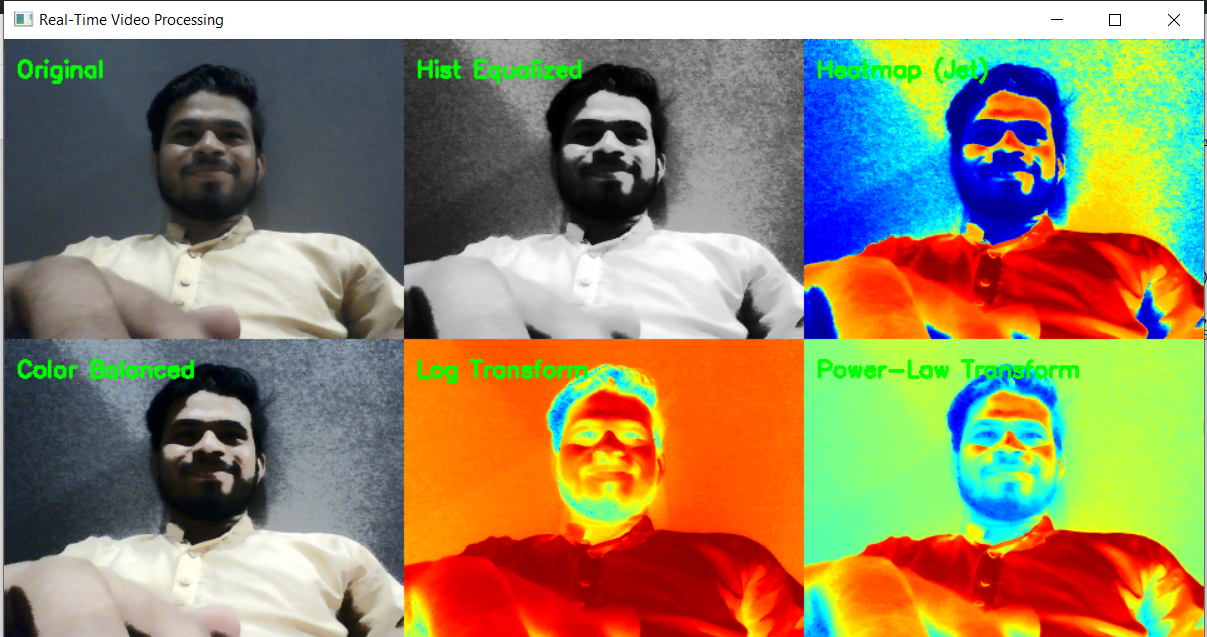